# House Price Prediction EDA

Problem: Price of a house depends on various features. It is always difficult for home seller to determine the price of their house. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this project aims to predict the final price of each home.

Basic data analysis libraries

In [113]:
# Import necessary python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Load train and test datasets

In [114]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Id column does not make any contribution to predictions but submission file requires id columns. So I separated the id columns for now from both datasets.

In [115]:
id_train= df_train['Id']
Id_test = df_test['Id']

df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

Basic information of the data

In [116]:
# Function to print basic information about the data

def data_info(df):
    
    print('Shape of the data: ', df.shape)
    
    print('------------########################------------------')
    print('                                                     ')
    print('Information of the data:')
    print(' ', df.info())
    
    print('------------########################------------------')
    print('                                                     ')
    print('Check the duplication of the data:', df.duplicated().sum())
    
    print('------------########################------------------')
    print('                                                     ')
    print('\nCheck the missing value of the data:\n', df.isnull().sum())

In [117]:
data_info(df_train)

Shape of the data:  (1460, 80)
------------########################------------------
                                                     
Information of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd

There are total 1460 entries and 80 features. There is no duplicate data but there are some missing values. We need to take of them.

Sattistical Summary of the Data

In [118]:
# Function to find out the Statistical susmmary 
def summary(df):
    print('\n Statistical Summary of Numberical data:\n', df.describe(include=np.number))
    print('------------########################------------------')
    print('\n Statistical Summary of categorical data:\n',df.describe(include='O'))
    
summary(df_train)


 Statistical Summary of Numberical data:
         MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207  

Visualization would reveal how features are related with target. 

In [119]:
# Function to visualize the target variable
def plot_target(df):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.title('Boxplot')
    sns.boxplot(df.SalePrice)

    plt.subplot(1,2,2)
    plt.title('Distribution Plot')
    sns.distplot(df.SalePrice, bins=20)
    plt.show()

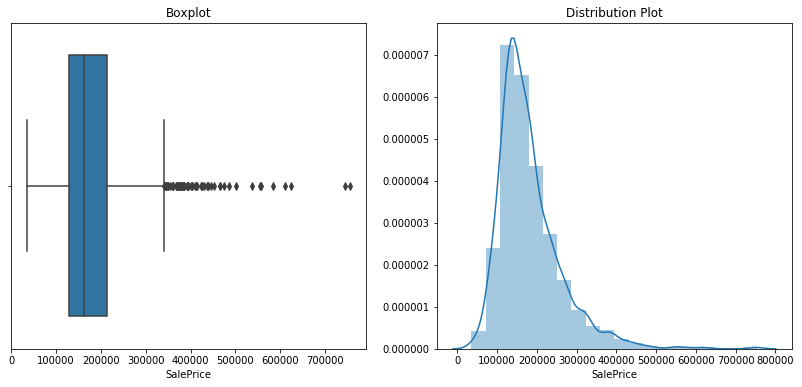

In [120]:
plot_target(df_train)

Box plot indicates the outliers and the distribution looks right skewed. ML models work best on normal distribution. Log transformation is used to transform the data to normal distribution. Two data points are very far. Surely they are outliers. So we can safely remove them. Further analysis is required for the rest of them.

In [121]:
# Remove outliers from target variables
df_train=df_train[df_train['SalePrice']<700000]

Text(0.5,1,'SalePrice Distributino')

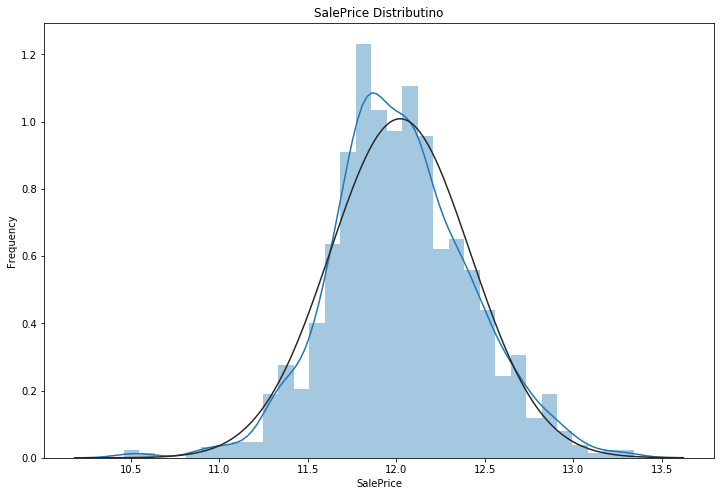

In [122]:
#Log tranformation of target column to make normal distribution

plt.figure(figsize=(12,8))

df_train['SalePrice']=np.log1p(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'], fit=norm);

plt.ylabel('Frequency')
plt.title('SalePrice Distributino')

In [123]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

In [124]:
# Removing suspicious outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index).reset_index(drop=True)
df_train=df_train.drop(df_train[(df_train['LotFrontage']>250) & (df_train['SalePrice']<300000)].index).reset_index(drop=True)
df_train=df_train.drop(df_train[(df_train['BsmtFinSF1']>1400) & (df_train['SalePrice']<400000)].index).reset_index(drop=True)
df_train=df_train.drop(df_train[(df_train['TotalBsmtSF']>5000) & (df_train['SalePrice']<300000)].index).reset_index(drop=True)
df_train=df_train.drop(df_train[(df_train['1stFlrSF']>4000) & (df_train['SalePrice']<300000)].index).reset_index(drop=True)

Dataset contains categorical and numerical data. For ploting i am going to separate them. So we can plot numerical and categorical comlumns separately.

In [125]:
# Let's separate the numerical and categorical columns
numerical_col=df_train.select_dtypes(include=[np.number])
categorical_col=df_train.select_dtypes(include=[np.object])
num_var=numerical_col.columns.tolist()
cat_var=categorical_col.columns.tolist()

Target vs categorical features

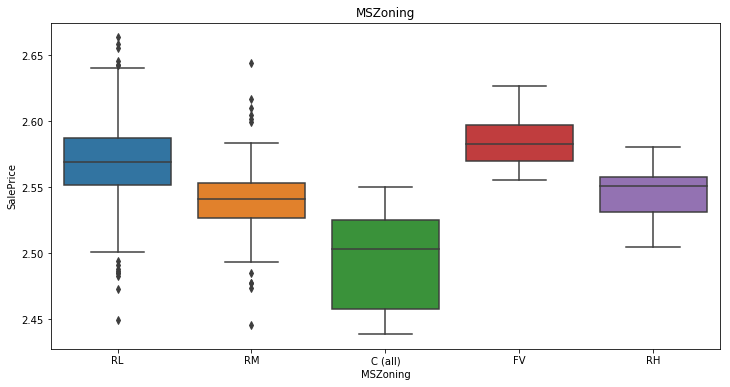

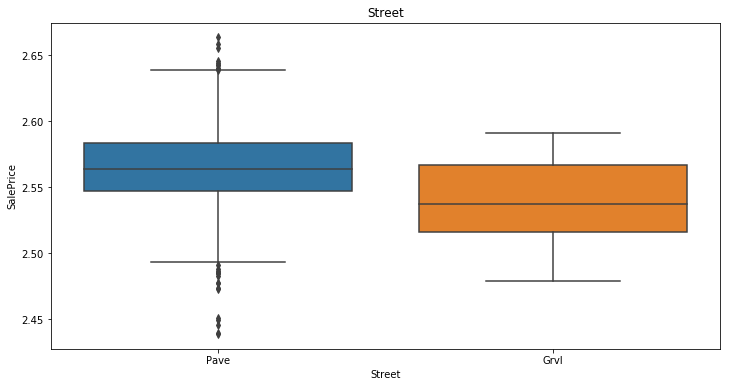

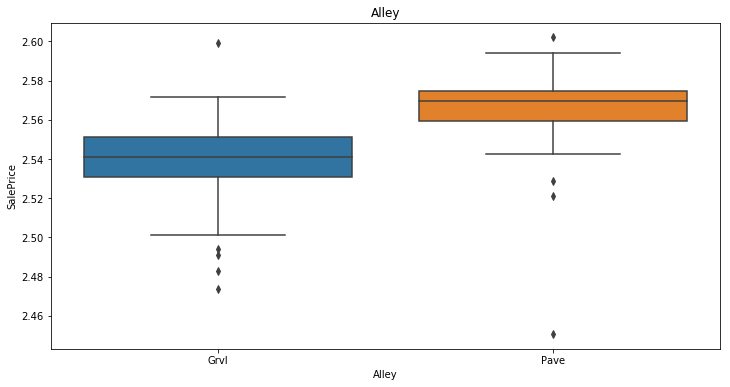

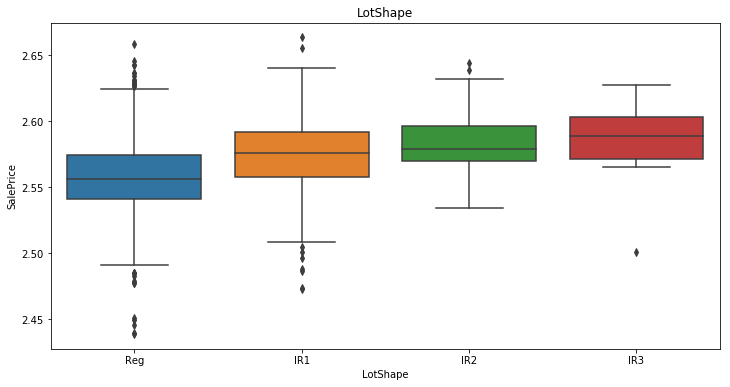

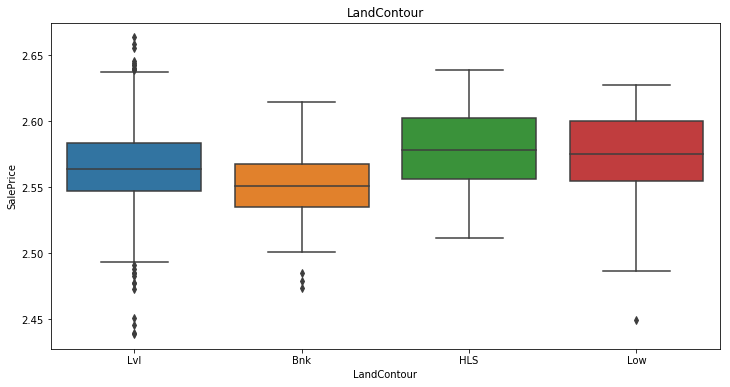

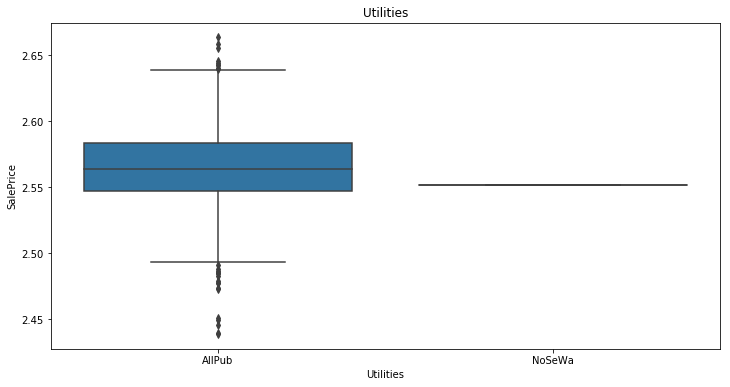

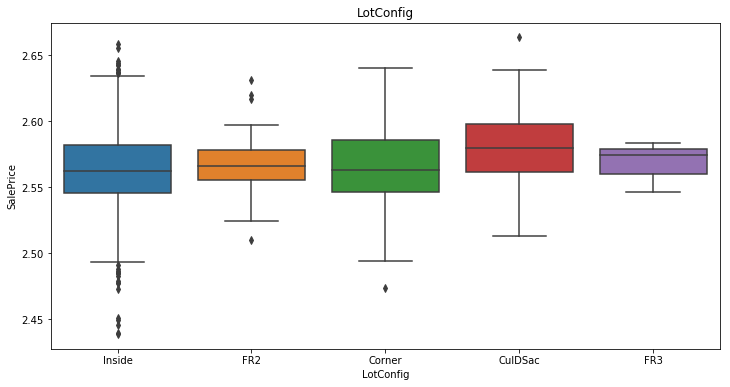

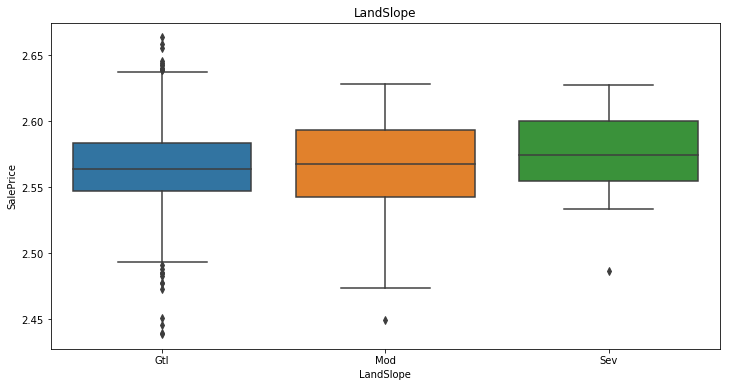

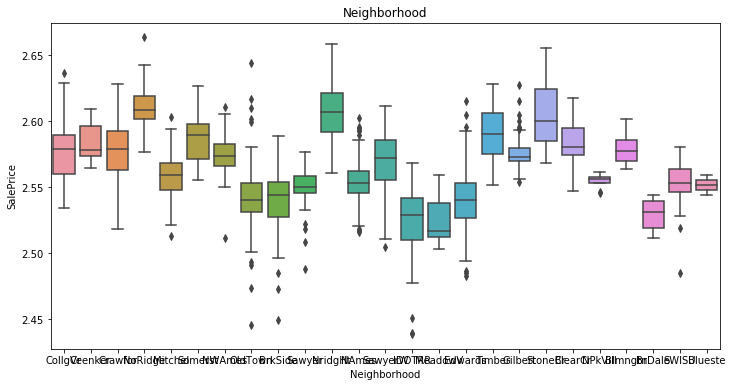

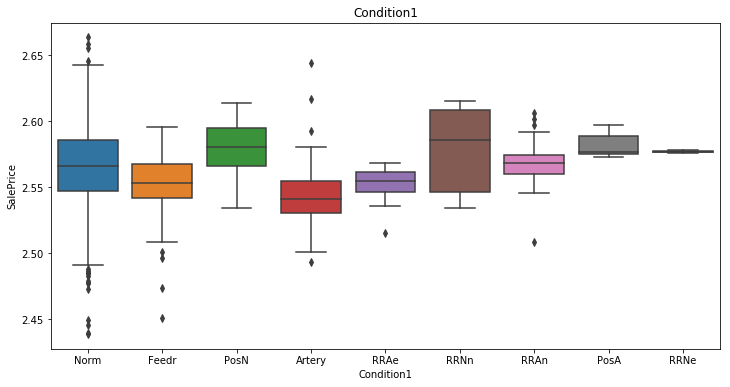

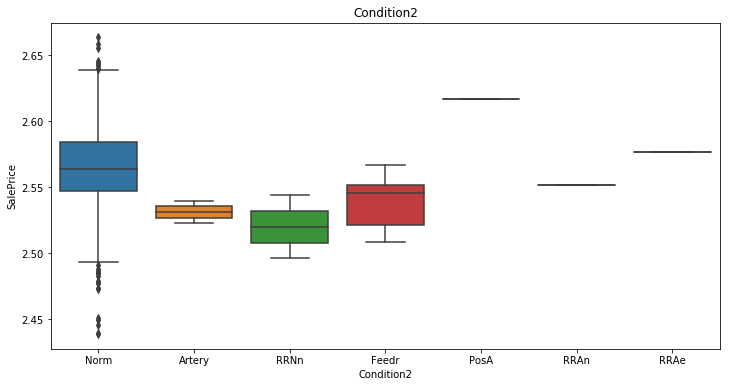

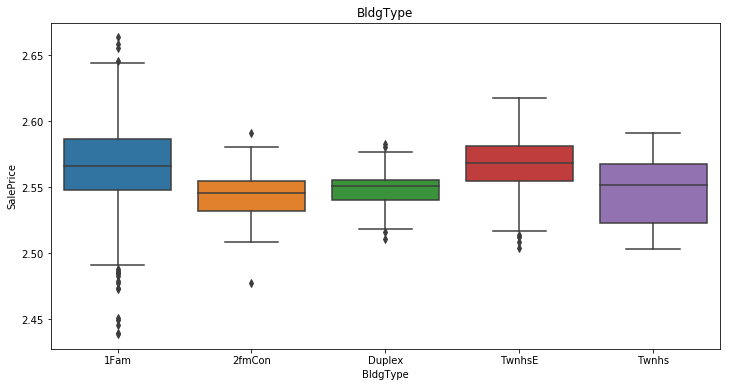

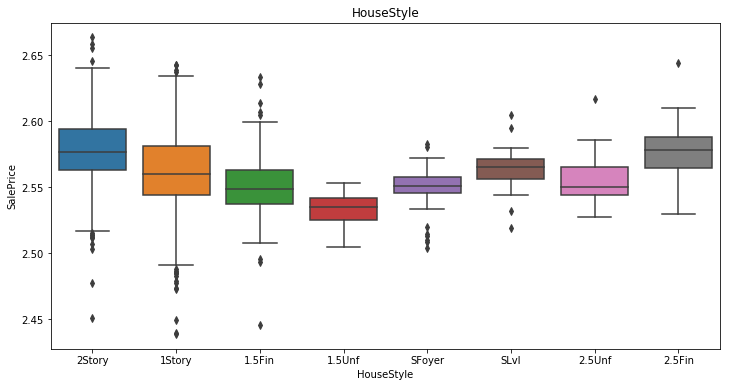

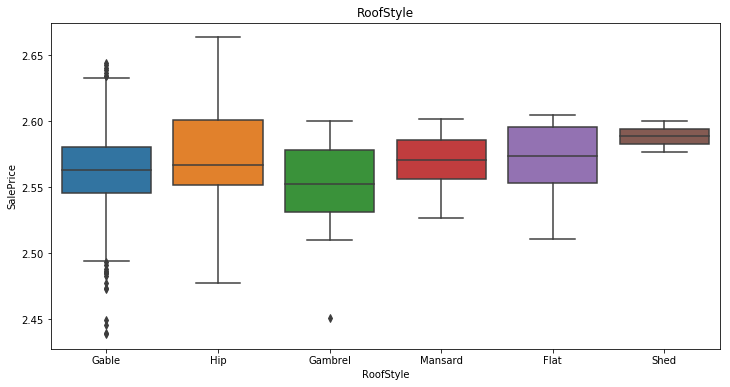

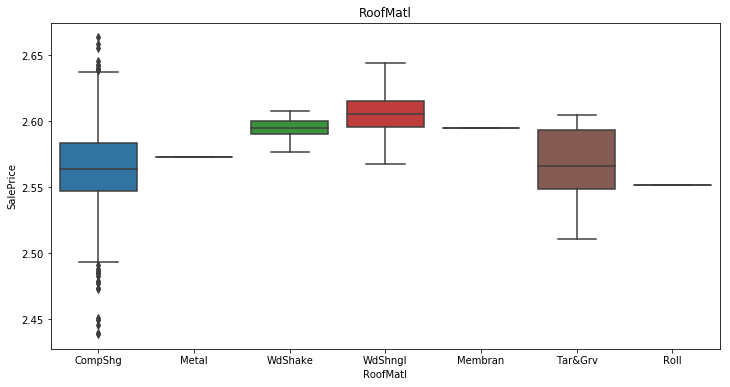

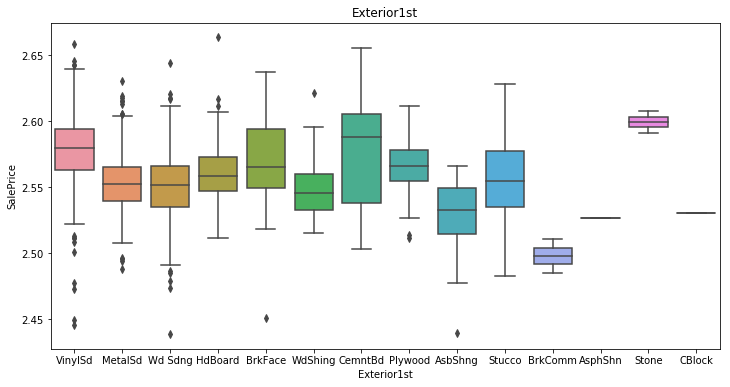

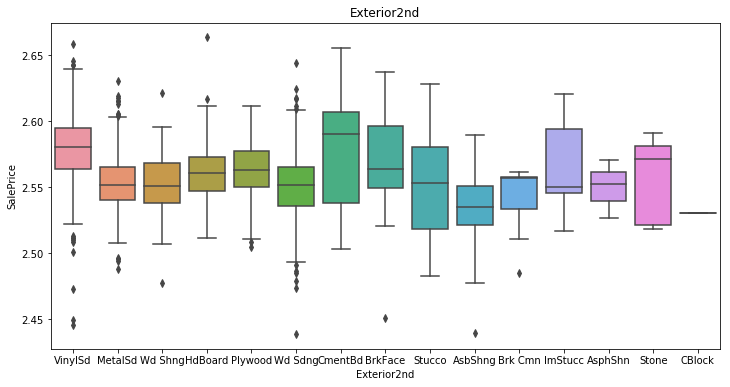

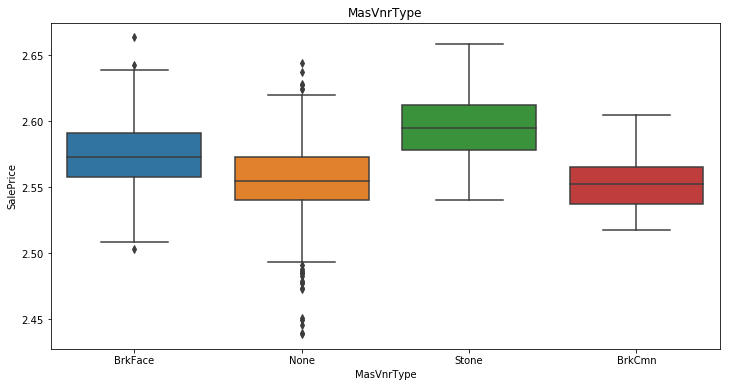

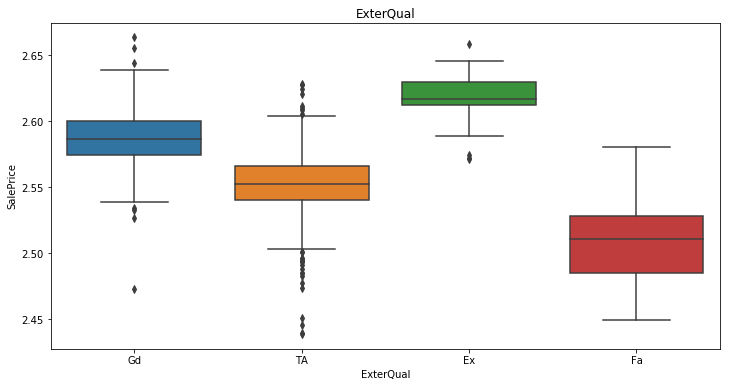

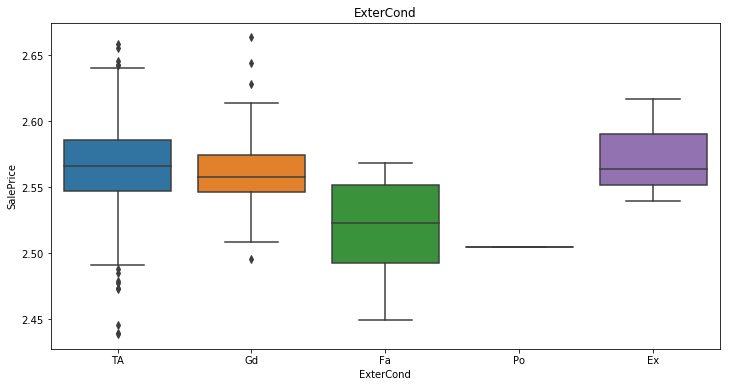

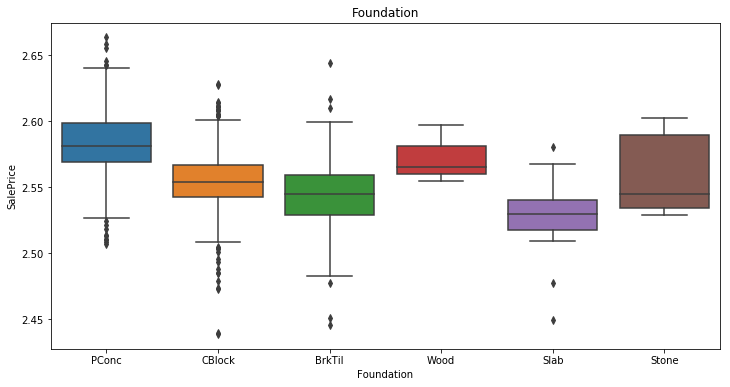

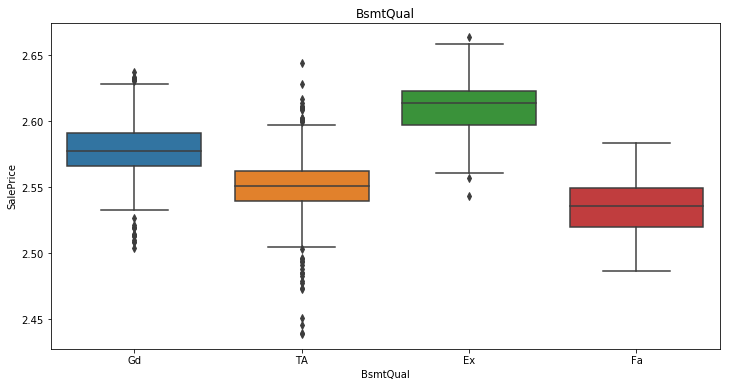

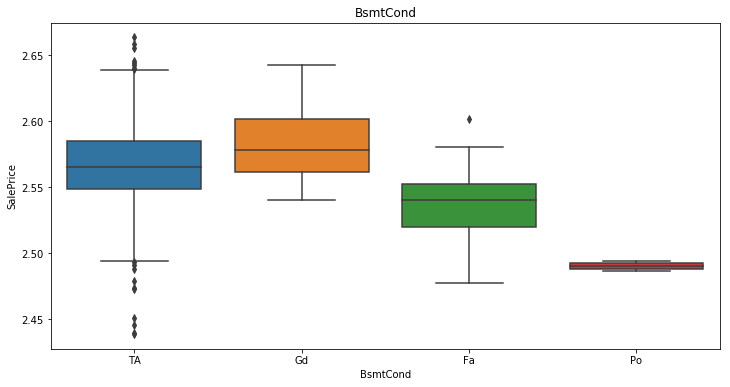

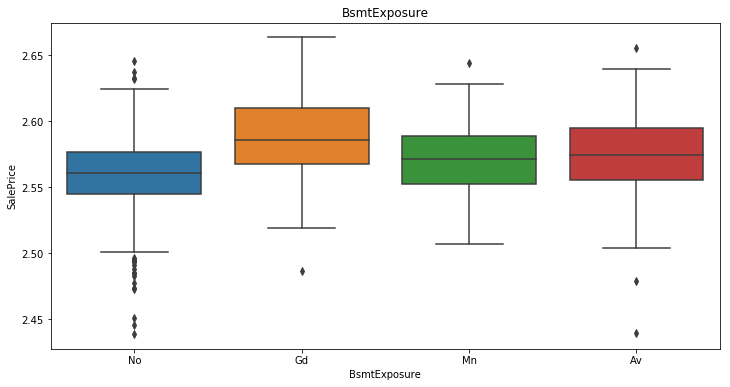

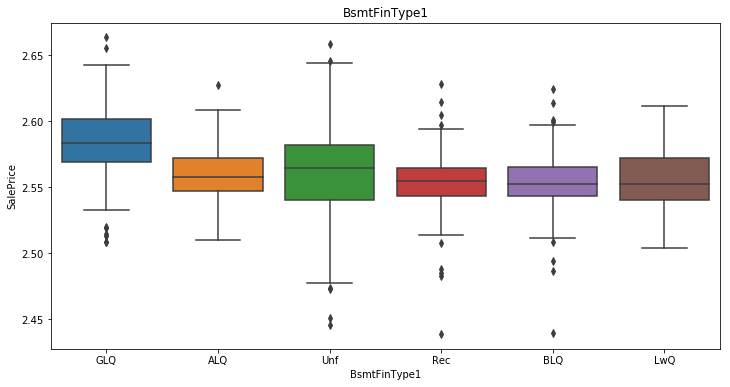

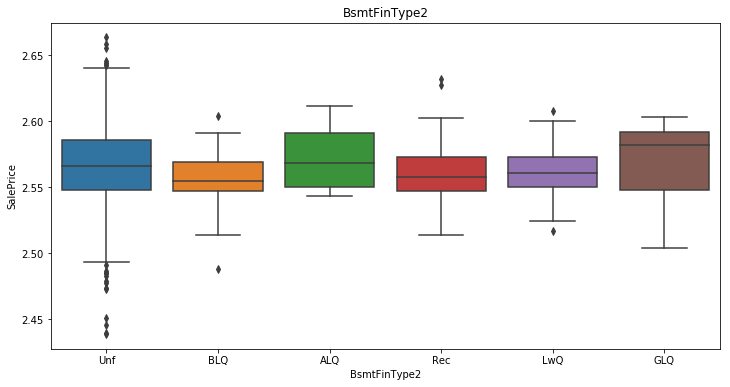

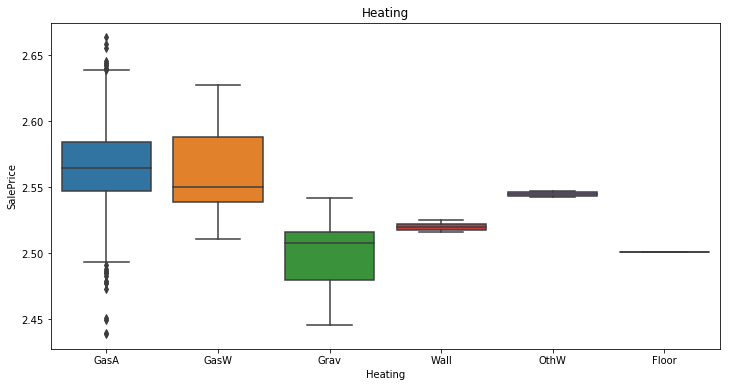

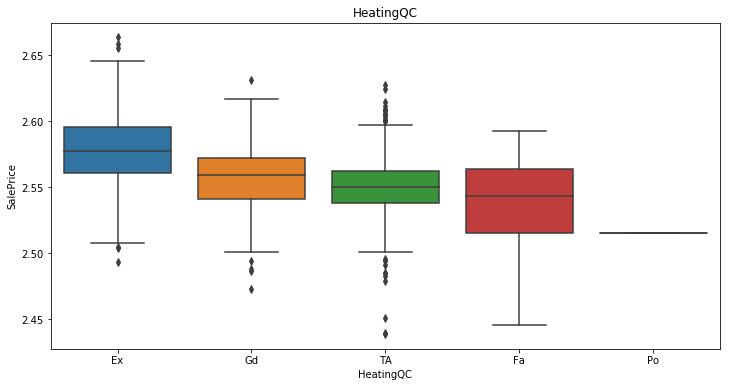

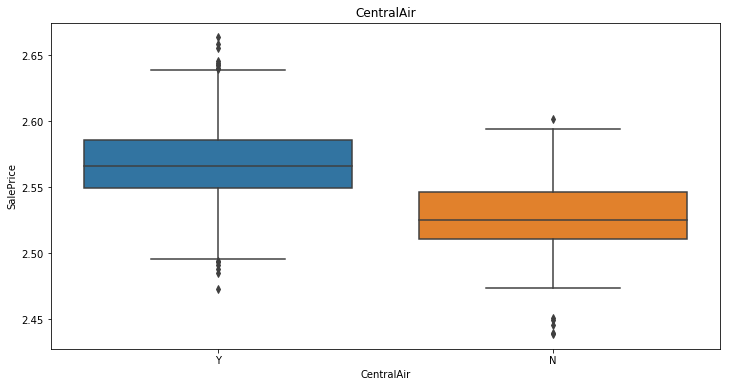

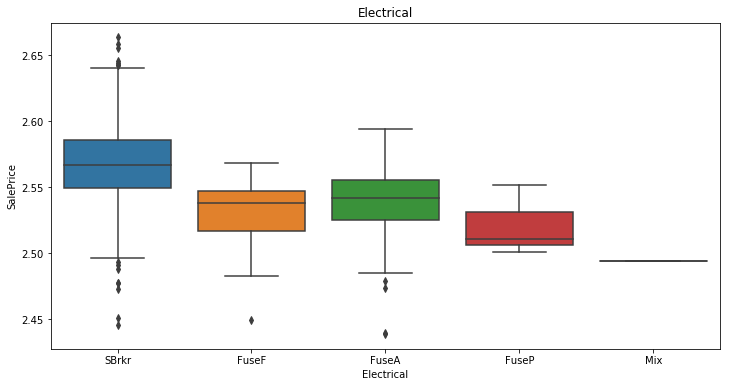

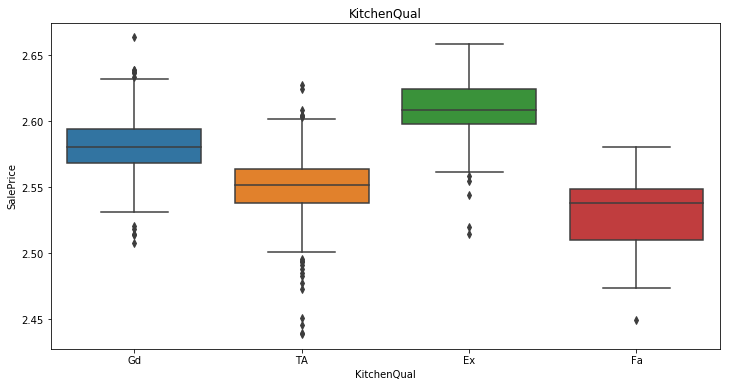

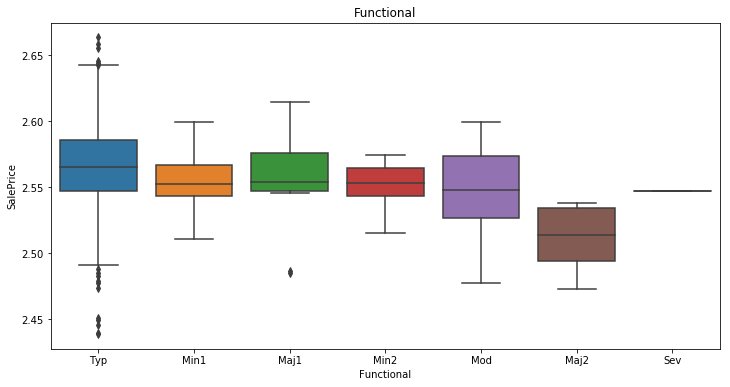

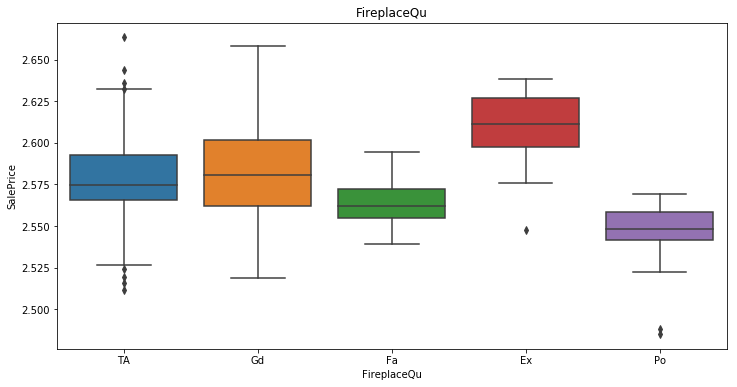

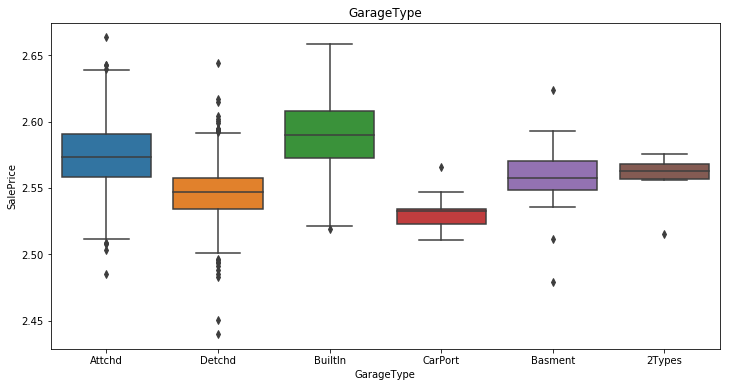

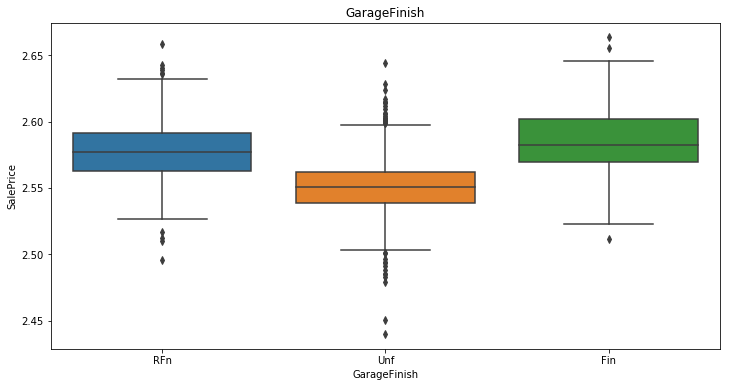

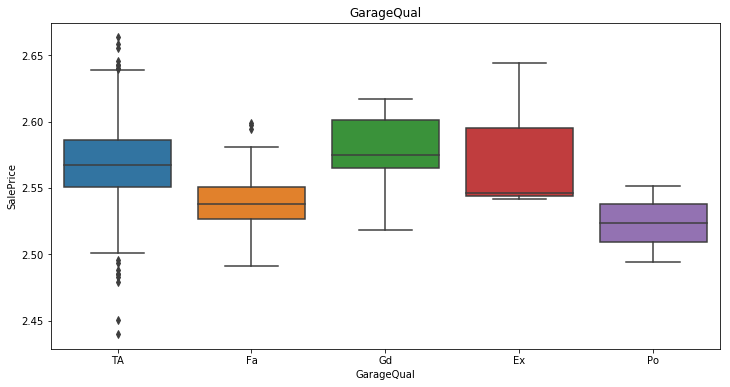

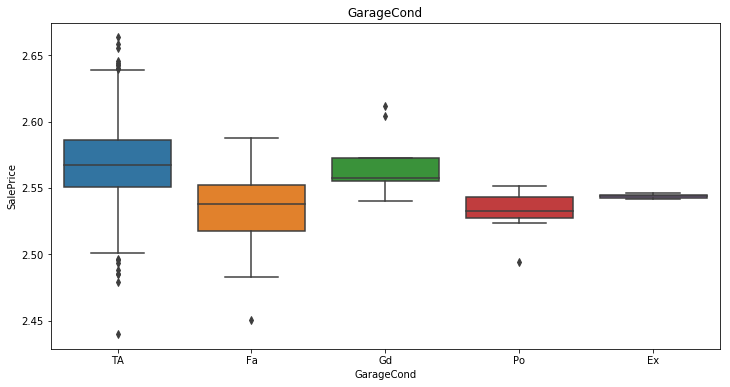

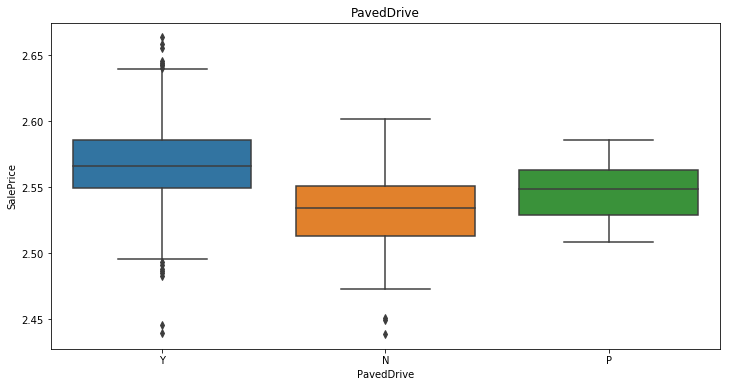

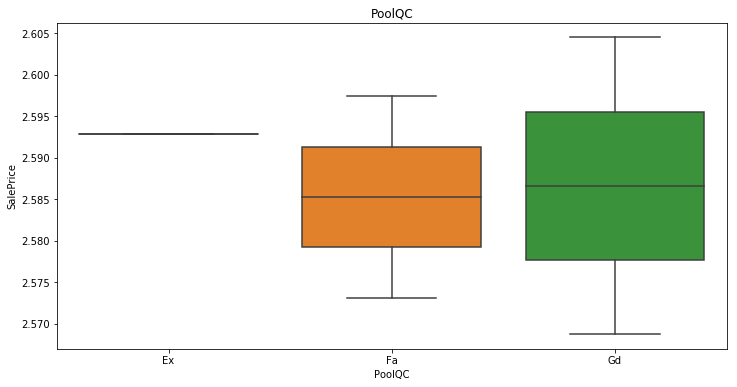

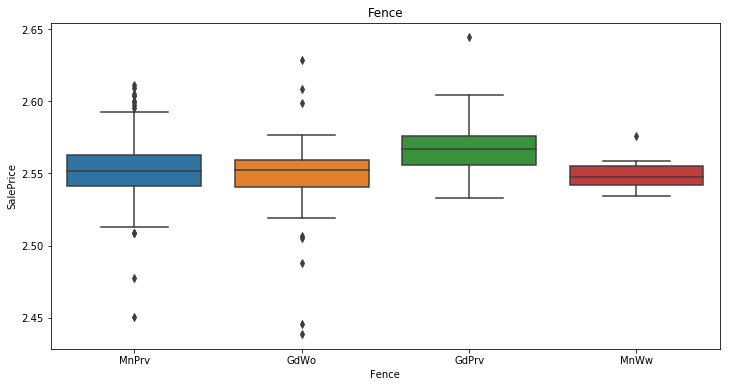

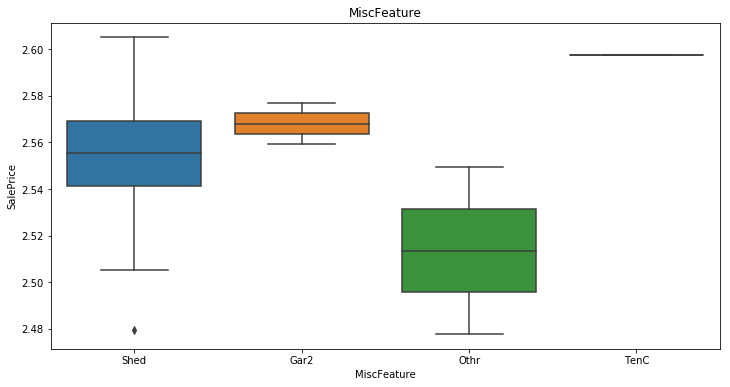

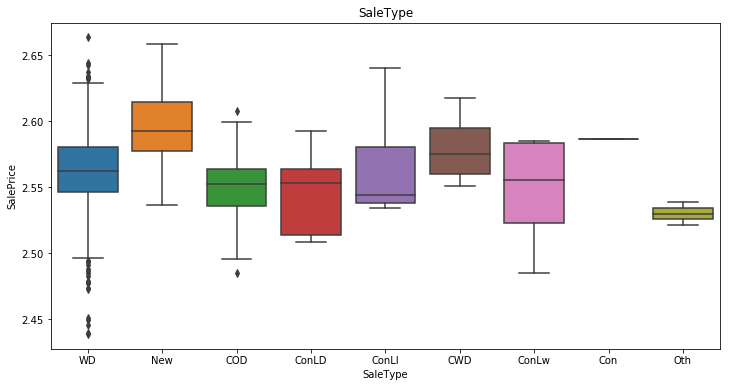

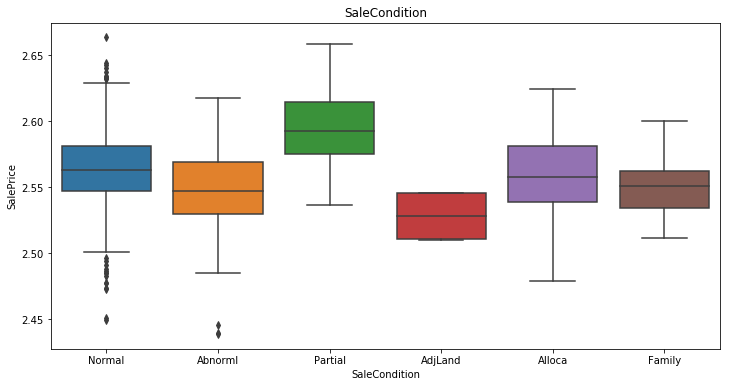

In [126]:
# Function to plot target vs categorical data
def cat_plot(df):
    for col in cat_var:
        f, ax = plt.subplots(figsize=(12, 6))
        sns.boxplot(x=col,y='SalePrice', data=df)
        plt.xlabel(col)
        plt.title('{}'.format(col))

cat_plot(df_train)

Neighborhood, Exterior 1st, Exterior2d and SaleType have great influence on SalePrice. They are highly correlated with SalePricce than other features.

Target vs numericla features

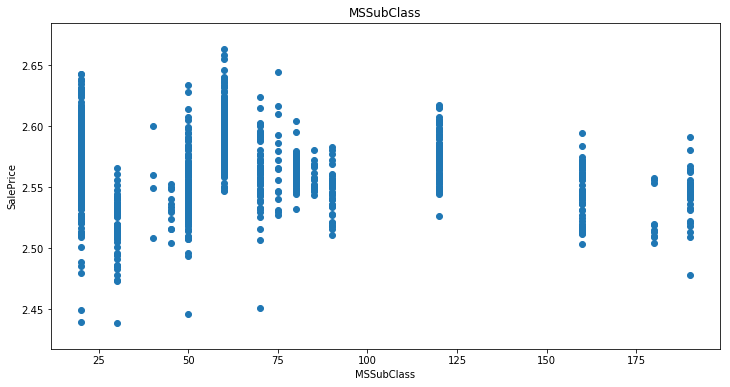

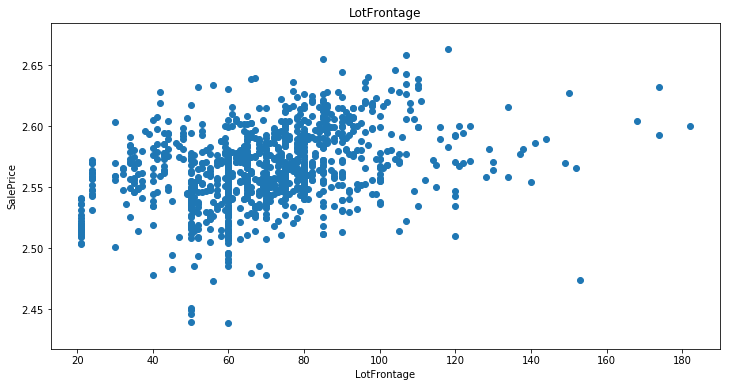

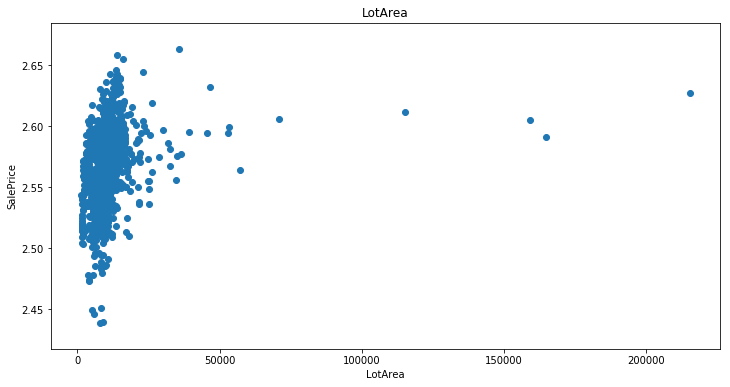

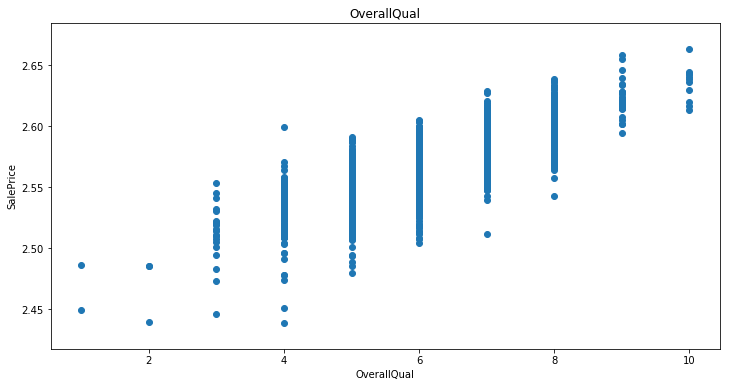

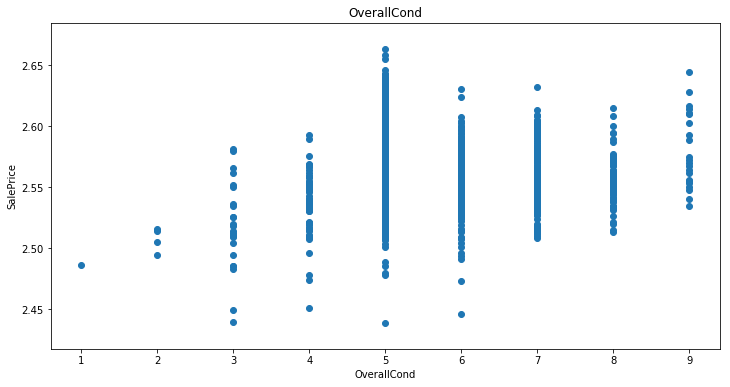

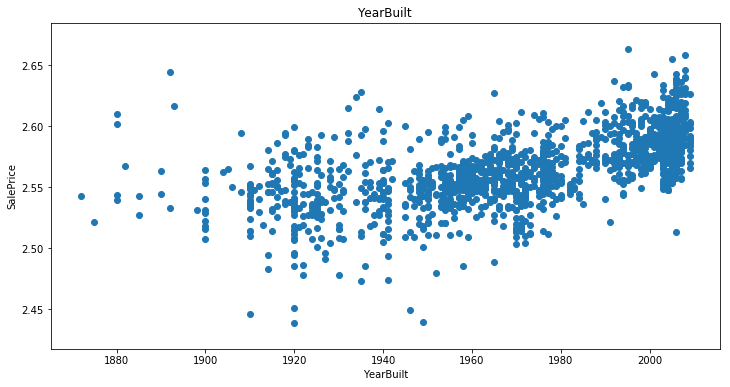

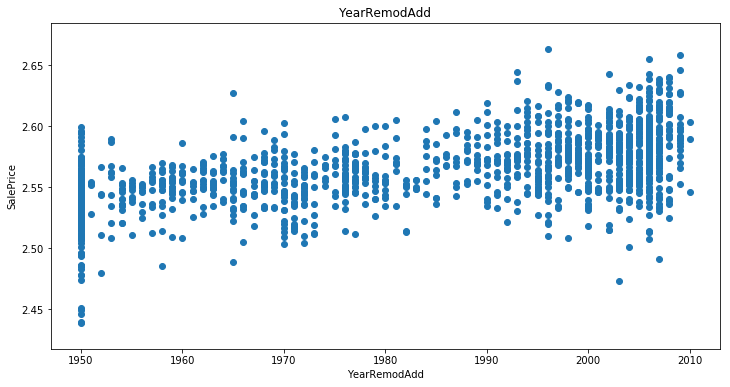

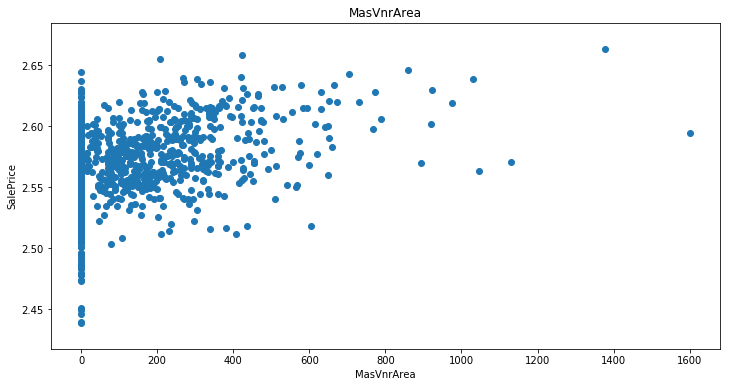

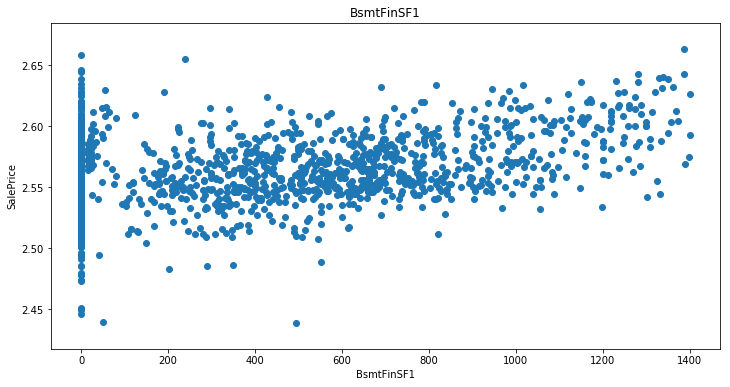

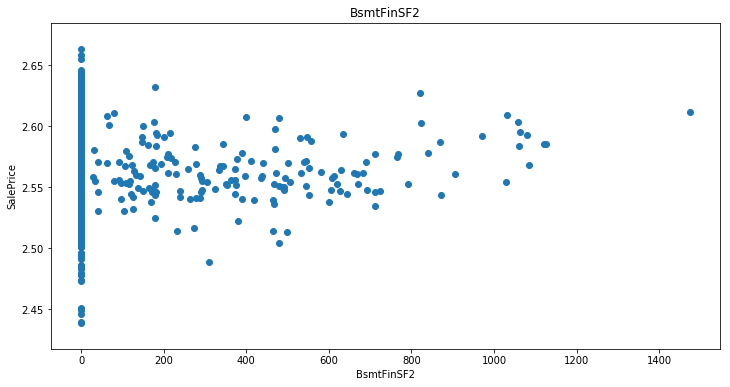

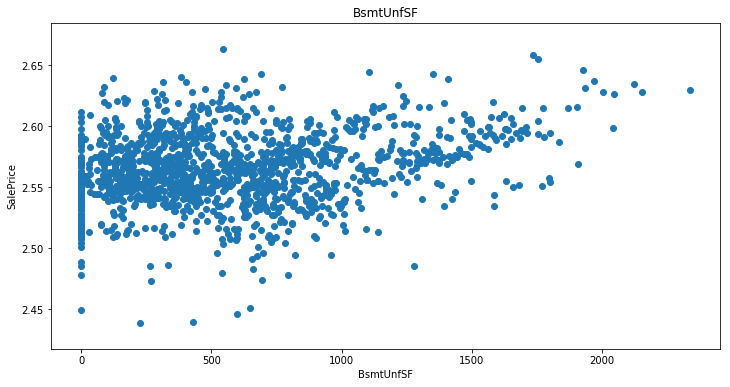

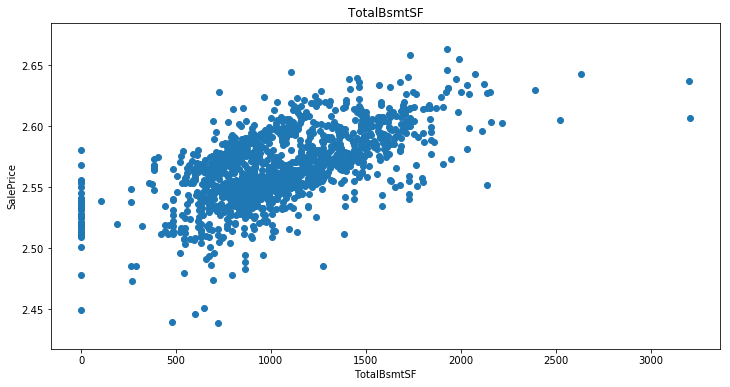

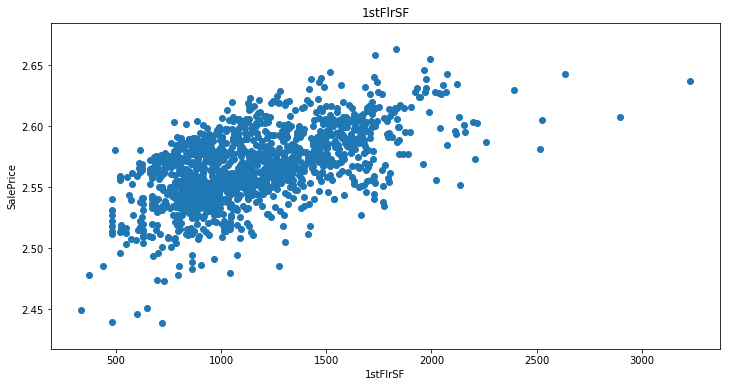

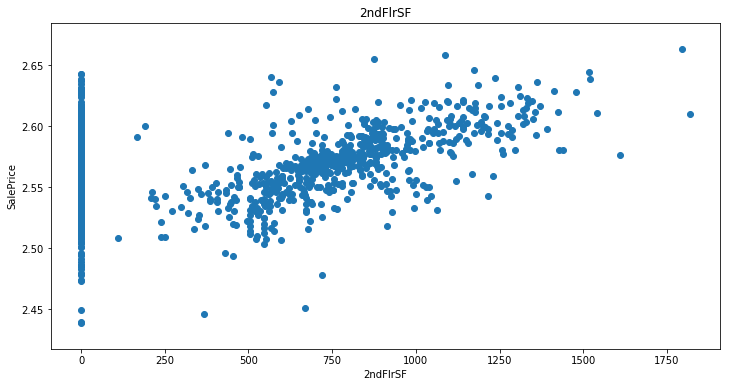

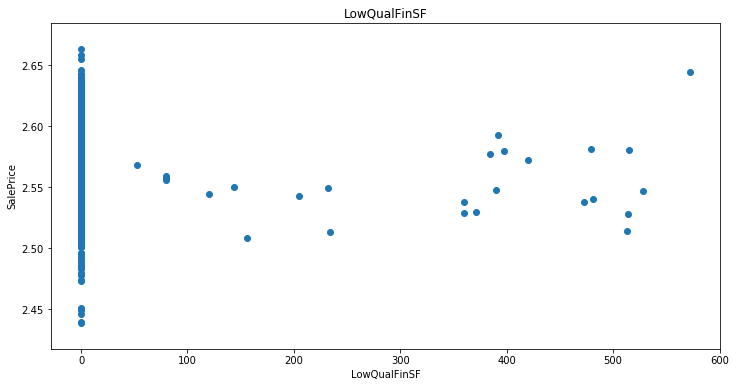

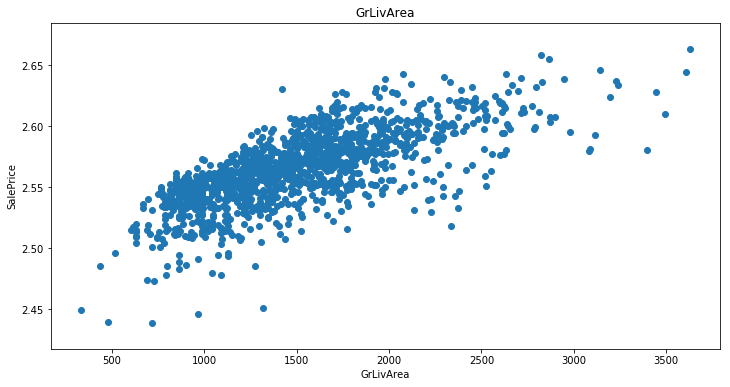

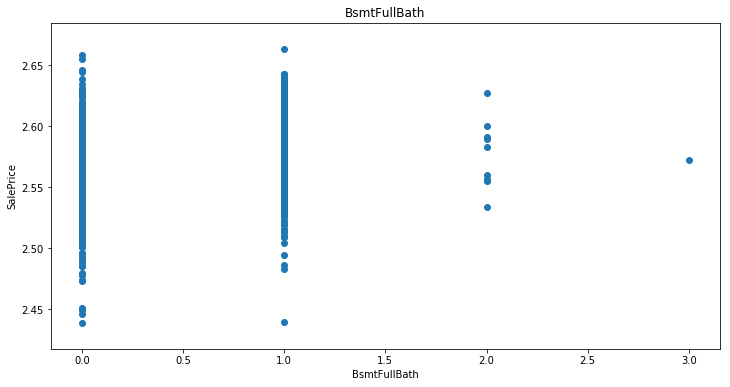

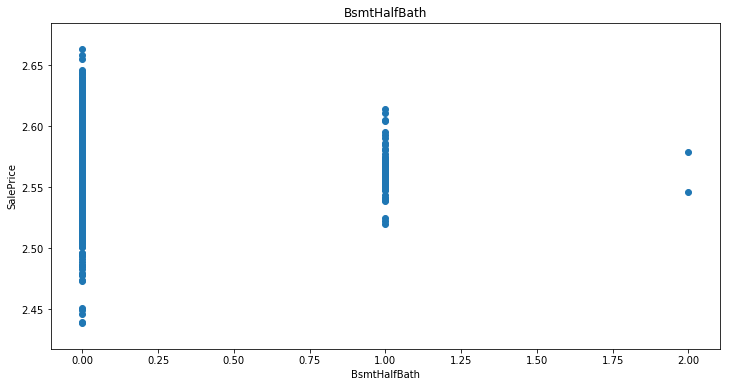

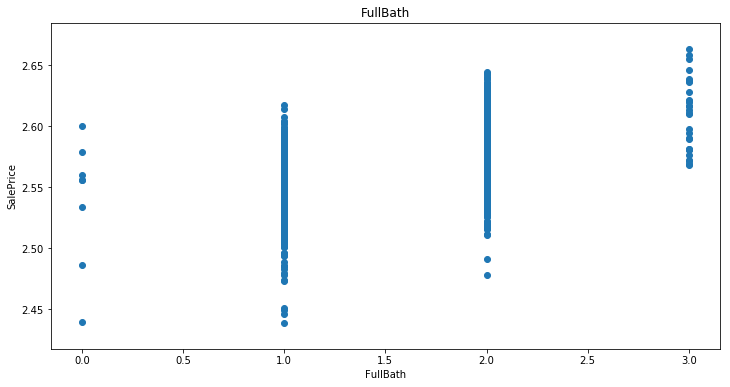

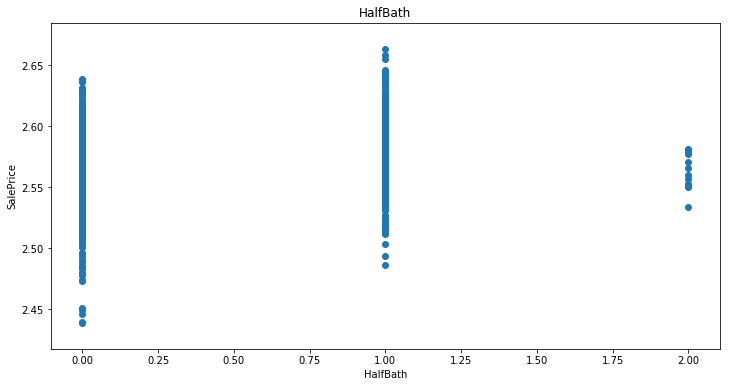

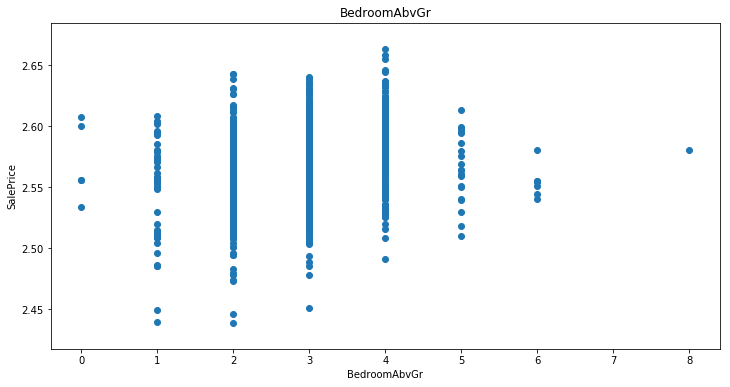

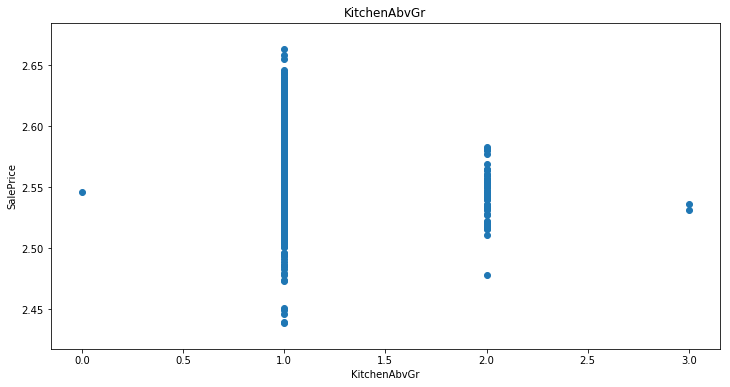

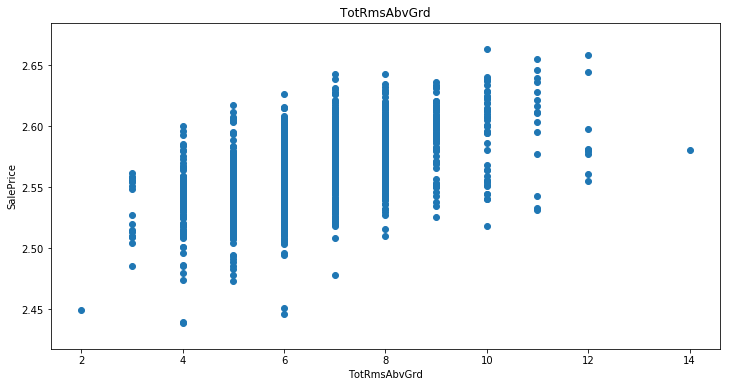

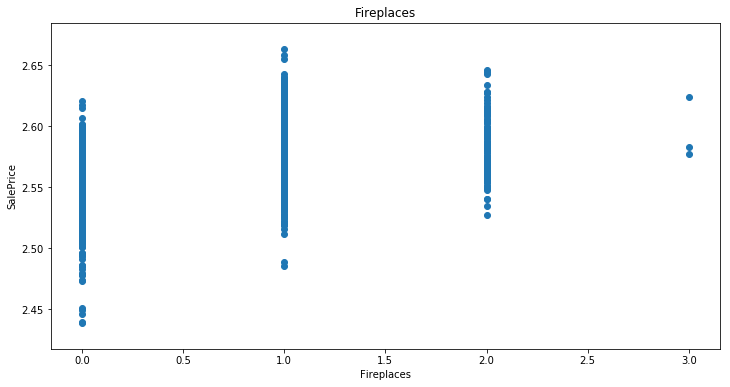

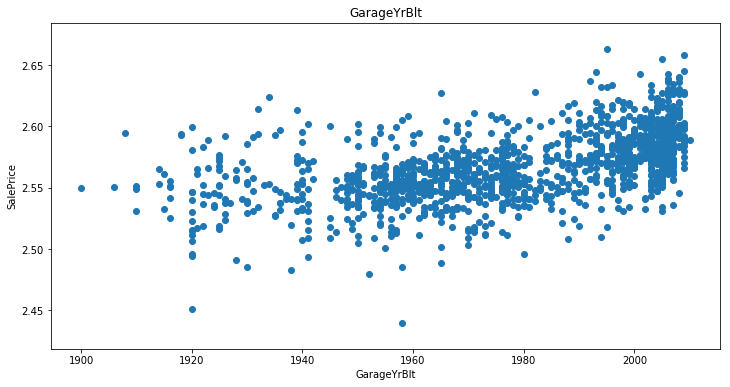

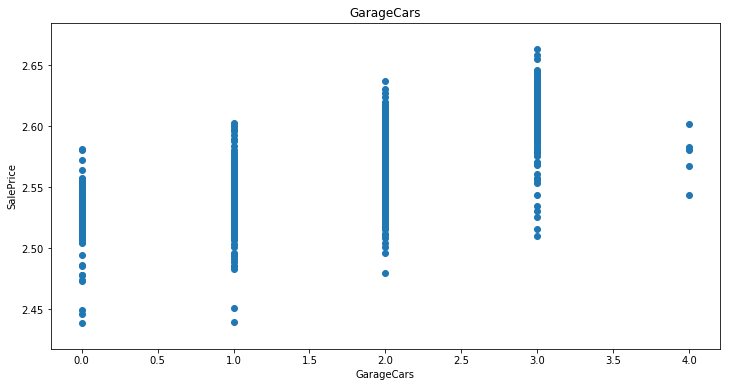

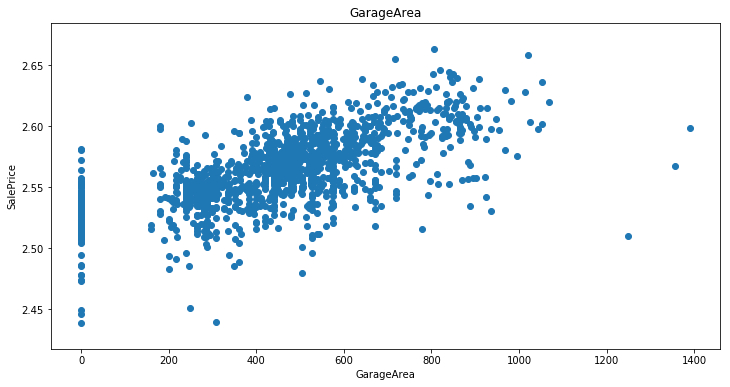

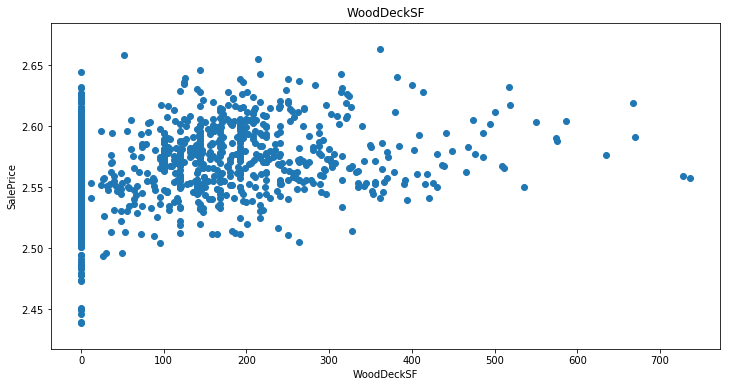

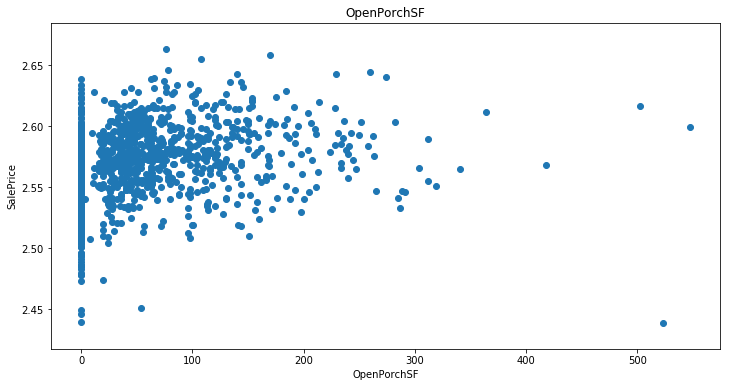

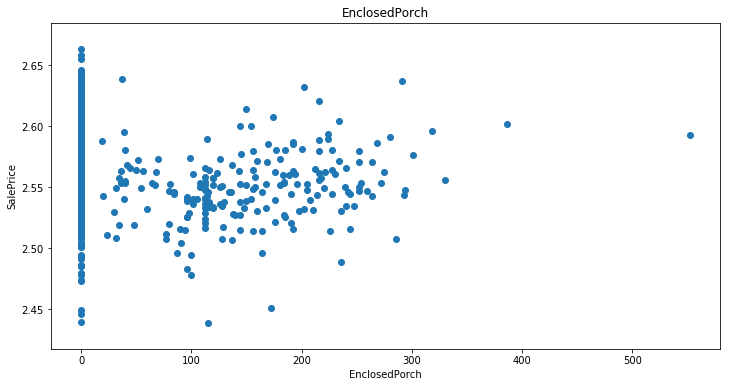

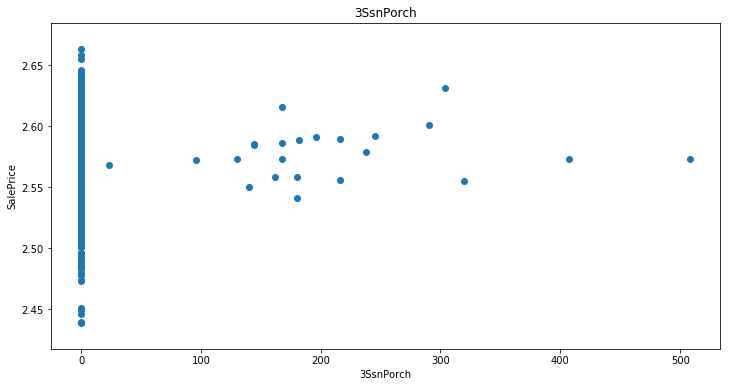

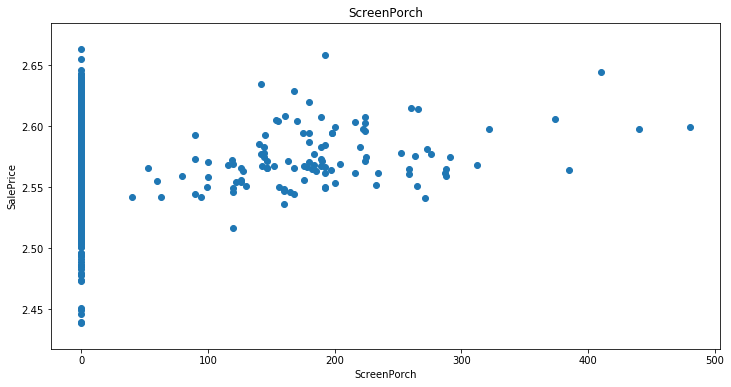

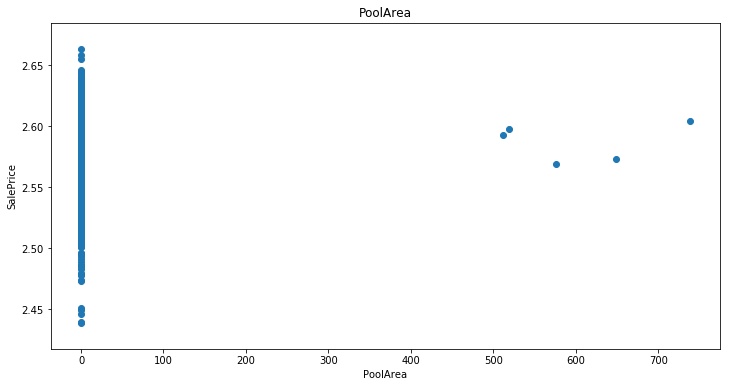

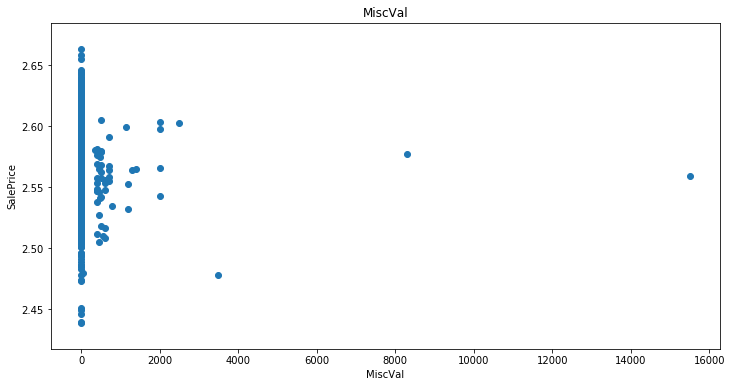

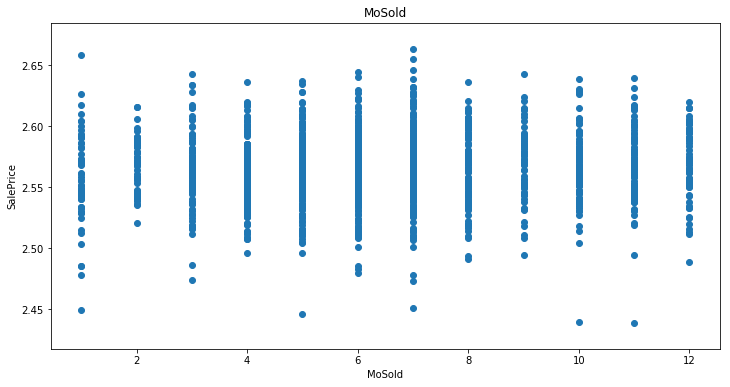

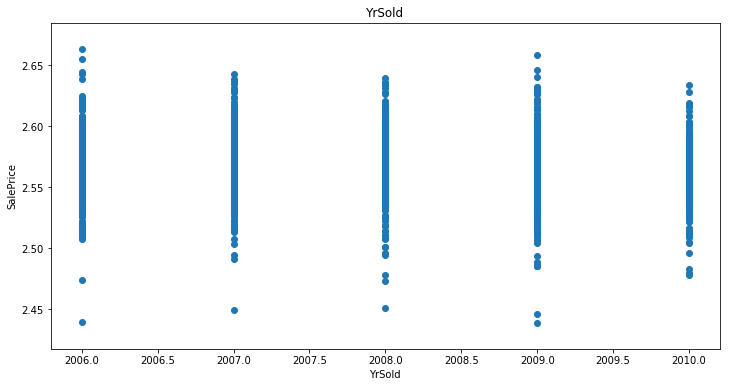

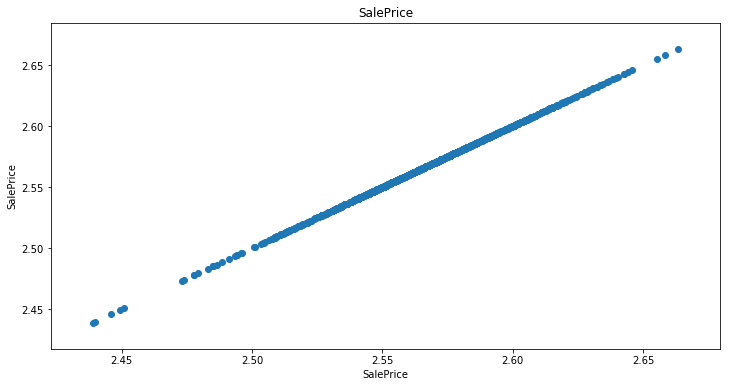

In [127]:
# Function to plot target vs numerical data
def num_plot(df):
    for col in num_var:
        f, ax = plt.subplots(figsize=(12, 6))
        plt.scatter(x=col,y='SalePrice', data=df)
        plt.xlabel(col)
        plt.ylabel("SalePrice")
        plt.title('{}'.format(col))
        
num_plot(df_train)

TotalBsmtSF, 1stFlrSF, 2ndFlrSF and GrLivArea are linearly correlated with SalePrice. Some features reveal suspicious points. They are LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, TotalBsmtSF,1stFlrSF GrLivArea, EnclosedPorch, MiscVal. Removing Outliers is not alawys safe. We might miss important informations. GarageArea and OpenPorchSF shows kind of similar relationship with SalePrice

From looking at the plot we can cleary see that there are some point which are highly suspicious. Let's remove the highly suspicous outliers

In [128]:
# Removing suspicious outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index).reset_index(drop=True)
df_train=df_train.drop(df_train[(df_train['LotFrontage']>250) & (df_train['SalePrice']<300000)].index).reset_index(drop=True)
df_train=df_train.drop(df_train[(df_train['BsmtFinSF1']>1400) & (df_train['SalePrice']<400000)].index).reset_index(drop=True)
df_train=df_train.drop(df_train[(df_train['TotalBsmtSF']>5000) & (df_train['SalePrice']<300000)].index).reset_index(drop=True)
df_train=df_train.drop(df_train[(df_train['1stFlrSF']>4000) & (df_train['SalePrice']<300000)].index).reset_index(drop=True)

Now let's merge the test and train data so that we can process togather. After processing we will separate train and test data.

In [129]:
# merging the data
train_len = len(df_train) # created length of the train data so that after EDA is done we can seperate the train and test data
data= pd.concat(objs=[df_train, df_test], axis=0).reset_index(drop=True)

As we have seen before that datasets have missing values. Detail analysis is required to take care of missing values. Let's take a look at the missing value columns.

In [130]:
# A function for calculating the missing data
def missing_data(df):
    tot_missing=df.isnull().sum().sort_values(ascending=False)
    Percentage=tot_missing/len(df)*100
    missing_data=pd.DataFrame({'Missing Percentage': Percentage})
    
    return missing_data.head(36)

missing_data(data)

,Missing Percentage
PoolQC,99.722222
MiscFeature,96.354167
Alley,93.125000
Fence,80.277778
SalePrice,50.659722
FireplaceQu,49.201389
LotFrontage,16.770833
GarageQual,5.486111
GarageYrBlt,5.486111
GarageFinish,5.486111


Missing value analysis

Missing Values on train data

    'PoolQC'-NA means no Pool
    'MiscFeature'- NA means None
    'Alley'- NA means No alley access
    'Fence'- NA means No Fence
    'FireplaceQu'-NA Means No Fireplace
    'LotFrontage'-Linear feet of street connected to property
    'GarageCond'-NA means No Garage
    'GarageType'-NA means No Garage
    'GarageYrBlt'-Year garage was built
    'GarageFinish'-NA means No Garage
    'GarageQual'- NA meand No Garage
    'BsmtExposure'-NA means No Basement
    'BsmtFinType2'-NA meand No Basement
    'BsmtFinType1'-NA means No Basement
    'BsmtCond'-NA mean No Basement
    'BsmtQual'- NA meand No Basement
    'MasVnrArea-Masonry veneer area in square feet
    'MasVnrType'-None means None
    'Electrical'-Electrical system

Missing value on test data

    SaleType -Different types of services offered
    BsmtFinSF1-Type 1 finished square feet
    BsmtFinSF2-Type 2 finished square feet
    Exterior1st-Exterior covering on house
    Exterior2nd-Exterior covering on house
    MSZoning-Identifies the general zoning classification of the sale
    BsmtFullBath-Basement full bathrooms
    BsmtHalfBath-Basement half bathrooms
    SalePrice- True sale price
    GarageCars-Size of garage in car capacity
    Functional-Home functionality (Assume typical unless deductions are warranted)
    KitchenQual-Kitchen quality
    Utilities-Type of utilities available
    TotalBsmtSF-Total square feet of basement area
    GarageArea- Size of garage in square feet
    BsmtUnfSF

The above mentioned columns have missing value. There are different ways of imputing missing values. From our observation we can replace categorical features with None and numerical features with 0.

In [131]:
# Features with missing value
miss_col1=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageType', 'GarageYrBlt',
           'GarageFinish', 'GarageQual', 'BsmtExposure','BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 
           'MasVnrArea', 'MasVnrType','SaleType','MSZoning','Utilities','Functional','Exterior1st','Exterior2nd',
           'BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','GarageArea','KitchenQual','GarageCars','BsmtFullBath',
           'BsmtHalfBath','BsmtUnfSF']
# Imputing missing value
for col in miss_col1:
    if data[col].dtype=='O':
        data[col]=data[col].fillna("None")
    else:
        data[col]=data[col].fillna(0)

'LotFrontage'-Linear feet of street connected to property. Each house is connected to the street, so most likely the it has similar area to neighbourhood house.

In [132]:
# Imputing missing value with neighborhood value
data['LotFrontage']=data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [133]:
# Imputing missing value with mode-most occuring no
data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0])

Now let's see the correlation plot of numerical data.

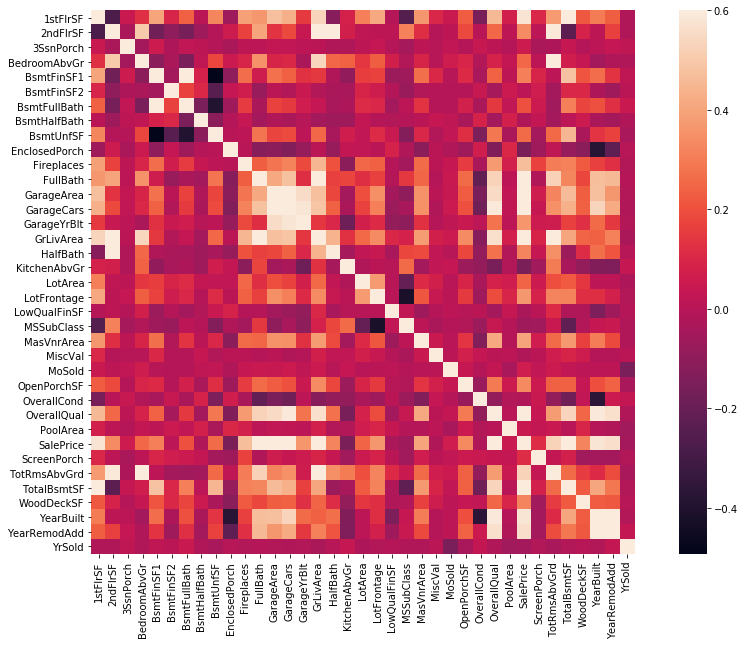

In [134]:
corr= data.corr()
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(corr, vmax=.6, square=True)

Looking at the correlation plot, GarageCars and GarageArea, and TotalBsmtSF have similar relationship with Saleprice. Let's do Zoomed heatmap plot to see relationship more closely.

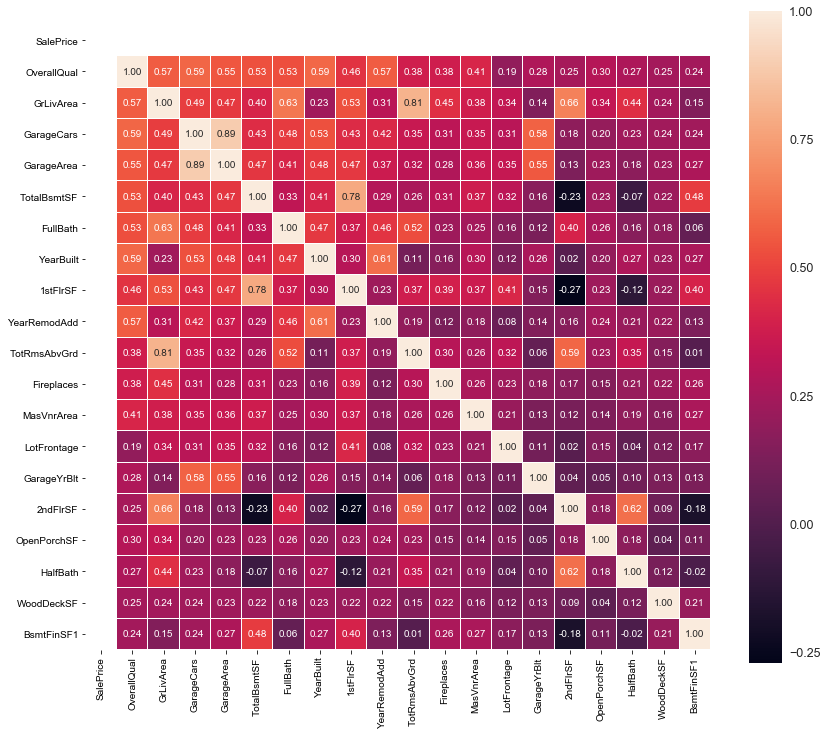

In [135]:
k = 20 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True,linewidths=0.004, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

By closely looking at the data, it is obvious that OverallQual is the highly correlated feautre followed by GrLivArea, GarageCars, Garage Area and TotalBsmtSF. 1stFlrSF, FullBath and YearBuilt have same correlation with SalePrice. Least correlated feature is BsmtFinSF1.

Creating new features. Since GrLivArea and Garage Area have high influence on Saleprice we can create a new features call total area

In [136]:
# Total area in units of square feet
data['TotSF']=data['TotalBsmtSF']+data['1stFlrSF']+data['2ndFlrSF']
data['TotArea']=data['GarageArea']+data['GrLivArea']

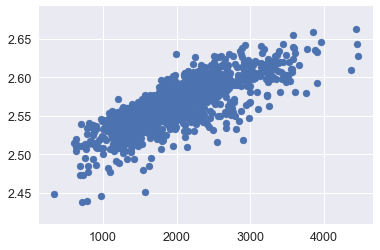

In [137]:
plt.scatter(x='TotArea',y='SalePrice', data=data)

Some of the columns are numerical but they are actually categorical. They are 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold'. These columns are converted into categorical columns.

In [138]:
cols=['MSSubClass','OverallCond','YrSold','MoSold']

for col in cols:
    data[col] = data[col].apply(str)

Converting categorical data to numerical data
Some features are ordinal and some of them are nominal. For ordinal data let's do the label encoding and for nominal data i will do one hot encoding.

In [139]:
categorical_col=data.select_dtypes(include=[np.object])
new_catcol=categorical_col.columns

Ordinal data

In [140]:
ordinal_cat=['OverallCond','KitchenQual','YrSold','MoSold','Fence','PoolQC','FireplaceQu','GarageQual', 
             'GarageCond','LotShape','LandSlope','HouseStyle','ExterQual','ExterCond','BsmtQual', 
             'BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2','HeatingQC','KitchenQual','CentralAir',
             'MSSubClass']

# label Encoding for ordinal data
from sklearn.preprocessing import LabelEncoder
label_encode=LabelEncoder()

for col in ordinal_cat:
    data[col]=label_encode.fit_transform(data[col])

Nominal data

In [141]:
# One hot encoding for nominal data
data=pd.get_dummies(data)

Separating target and features

In [142]:
df_target=data['SalePrice']
df_features=data.drop(columns=['SalePrice'])

Data Preparation

In [143]:
X_train=df_features[:train_len]
Y_train=df_target[:train_len]
X_test=df_features[train_len:]

In [144]:
X_train.shape,Y_train.shape, X_test.shape

((1421, 234), (1421,), (1459, 234))

Our data is ready for modeling. In the next notebook, detail modelling are described.